### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2019 ###

# Equity Valuation and Portfolio Optimization Using Modern Portfolio Theory #

#### Noah Dreikosen (njdreikosen@wisc.edu), Cole Thomson (cthomson4@wisc.edu), Ritik Goyal (ragoyal2@wisc.edu), and Zachary Easton (zeaston@wisc.edu) ####

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
  1. [Equity Valuation Model](#2.A.-Equity-valuation-model)
  1. [Markowitz Modern Portfolio Model](#2.B.-Markowitz-modern-portfolio-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Standard Deviations and Expected Returns of Basket of Equities](#4.A.-Standard-deviations-and-expected-returns-of-basket-of-equities)
  1. [Optimal Portfolio Examples \- Long Positions](#4.B.-Optimal-portfolio-examples-\--long-positions)
  1. [Optimal Portfolio Examples \- Short Positions](#4.C.-Optimal-portfolio-examples-\--short-positions)
  1. [Pareto Frontier](#4.D.-Pareto-Frontier)
  1. [Accuracy of Models and Possible Improvements](#4.E.-Accuracy-of-models-and-possible-improvements)
1. [Conclusion](#5.-Conclusion)
1. [References](#6.-References)

## 1. Introduction ##

Approximately \$169 billion dollars of stocks are traded daily on the [New York Stock Exchange](https://en.wikipedia.org/wiki/New_York_Stock_Exchange).  The overall value of the companies traded in the U.S. stock market is $34 trillion. This equates to [roughly 43% of the value of all publicly traded companies in the world](https://www.nasdaq.com/article/us-stock-market-is-biggest-most-expensive-in-world-but-us-economy-is-not-the-most-productive-cm942558) (Surz, 2018). Millions of investors look to buy (sell) companies that they feel are undervalued (overvalued) so that they may sell (cover) their position at some later date for a profit. To do this, traders and investors must analyze thousands of stocks based on the expected risks and returns, which can be done many different ways. One such strategy that investors use, which will be examined in this project, combines [Modern Portfolio Theory](https://en.wikipedia.org/wiki/Modern_portfolio_theory), introduced by economist Harry Markowitz, with [Fundamental Analysis](https://en.wikipedia.org/wiki/Fundamental_analysis) of the underlying factors that affect a stock's price - a method widely advocated by investing juggernauts like [Benjamin Graham](https://www.investopedia.com/articles/07/ben_graham.asp) and [Warren Buffett](https://www.investopedia.com/university/warren-buffett-biography/).

This project attempts to accomplish two main tasks. First, an absolute equity (stock) valuation model is to be developed that receives fundamental data of a company as parameters and returns the value of the company. The value returned by the model is assumed to be the intrinsic value of the company. This value can be compared to the market capitalization (or market value - as determined by the company’s stock price and number of outstanding shares) to determine if the stock is under, over, or fair-valued. Second, an optimal portfolio is to be developed using both the Markowitz Modern Portfolio Theory and the valuation determined by the previous model. Both long (buying securities) and short (selling securities by borrowing shares) optimal portfolios are discussed and explored.

Benjamin Graham, and his famed prodigy Warren Buffett, have forged their investment principles by leveraging fundamental characteristics (among a few other ideas) of a company to determine its actual value. [Fundamental data](https://www.investopedia.com/articles/fundamental/03/022603.asp) is any data that is expected to affect the perceived value of an equity (McClure, 2019). Examples of fundamental data include: cash flow, return on assets, earnings, debt levels, and many more. In total, there were 74 fundamental metrics used to develop the equity valuation model described in this report. In this project, 1,230 samples were collected from years 2012 to 2016. Each of these samples are sourced from Form 10-K SEC filings that companies must submit to shareholders on a yearly basis.  This dataset can be found on [Kaggle](https://en.wikipedia.org/wiki/Kaggle), an open source data science community, from which both [fundamental analysis](https://www.kaggle.com/dgawlik/nyse#fundamentals.csv) and [stock price](https://www.kaggle.com/dgawlik/nyse#prices-split-adjusted.csv) data is taken.

Harry Markowitz developed what is now known as [Modern Portfolio Theory (MPT)](https://www.investopedia.com/terms/m/modernportfoliotheory.asp) that was first published in The Journal of Finance in 1952 (Chen, 2019). The model has various assumptions not discussed in this report, but is rooted in the idea that choosing a group of investment equities which collectively have lower risk than any single equity will have on its on its own. Depending on investment goals, a tradeoff between the expected returns of a portfolio and the risk of the associated portfolio can be explored. An optimal portfolio lies on the Pareto frontier of [expected returns and expected portfolio risk](https://www.investopedia.com/terms/m/markowitzefficientset.asp) (Kenton, 2018). In this project, we explore the addition of a third tradeoff term to determine an optimal portfolio. This additional term is the amount undervalued (or overvalued) of an equity as determined by our equity valuation model. We explore different trade-offs to reflect different investment styles in this report.

In the coming sections mathematical models, solution code (in Julia 1.1.0), discussion of results, and the conclusion of this optimization project will be available.

## 2. Mathematical model ##

### 2.A. Equity Valuation Model ###

**Type of Model:** Least Squares Regression

**Variables:**

Weights of each fundamental attribute to determine the value of a company's stock:

$$
\begin{aligned}
& u_j && j=1,\dots,75
\end{aligned}
$$

**Parameters:**

Company _i_ with fundamental attribute *j*:

$$
\begin{aligned}
& B_{i,j} && i=1,\dots,1230 \text{ and } j=1,\dots,75
\end{aligned}
$$

Market capitalization of company *i*:

$$
\begin{aligned}
& y_i && i=1,\dots,1230
\end{aligned}
$$

**Constraints:**

There exists no constraints for this model.

**Objective:**

We aim to find the curve that predicts the true value of a company based on the company's current fundamental data. To accomplish this, we set the objective to minimize the sum of squares between the companies' current market capitalization (*y*) and the market capitalization predicted by our model (_B x u_).

**Full Model:**

$$
\begin{bmatrix}
  b_{1,1} & \dots & b_{1,75} \\
  \vdots & \ddots & \vdots \\
  b_{1232,1} & \dots & b_{1232,75}
\end{bmatrix}
\begin{bmatrix} u_{1} \\ \vdots \\ u_{75} \end{bmatrix} =
\begin{bmatrix} y_{1} \\ \vdots \\ y_{1230} \end{bmatrix}
$$

$$
\begin{aligned}
\underset{u}{\text{minimize}}\qquad& {||y-Bu||}^2\\
\end{aligned}
$$



### 2.B. Markowitz Modern Portfolio Model ###

**Type of Model:** Quadratic Program

**Variables:**

Proportion of total portfolio to invest in equity *i*:

$$
\begin{aligned}
& X_i && i=1,\dots,306
\end{aligned}
$$

**Parameters:**

Expected daily return of equity *i* as a percentage:

$$
\begin{aligned}
& \mu_i && i=1,\dots,306
\end{aligned}
$$

Covariance between equity *i* and equity _j_ (used to measure risk):

$$
\begin{aligned}
& \Sigma_i && i=1,\dots,306
\end{aligned}
$$

Percent difference between the estimated value of the company and the current market capitalization of the company (obtained from Equity Valuation Model):

$$
\begin{aligned}
& {\Delta}_i && i=1,\dots,306
\end{aligned}
$$

Tradeoff weights for covariance matrix (risk) and the percent under/over valued determined by the Equity Valuation Model:

$$
\begin{aligned}
& \lambda_1 && \lambda_2
\end{aligned}
$$

**Constraints:**

  **For Long Portfolio:** 
The amount invested in each company must be non-negative, and no single investment may exceed 20% of the total portfolio:

$$
\begin{aligned}
& 0 \le X_i \le 0.2 && i=1,\dots,306
\end{aligned}
$$

The portfolio is allocated to 100% capacity:

$$
\begin{aligned}
& \sum_{i=1}^{306}X_i = 1
\end{aligned}
$$

  **For Short-only Portfolio:**
  
The amount invested in each company must be non-positive, and no single investment may exceed 20% of the total portfolio:

$$
\begin{aligned}
& -0.2 \le X_i \le 0 && i=1,\dots,306
\end{aligned}
$$

The portfolio is allocated to 100% capacity:

$$
\begin{aligned}
& \sum_{i=1}^{306}X_i = -1
\end{aligned}
$$

**Objective:**

For a Long porfolio, we aim to maximize the total expected return of the portfolio, minimize the risk, and maximize the percent difference between estimated stock valuation and the current market valuation. For a Short-Only portfolio, we aim to minimize the total expected return of the portfolio, minimize the risk of the entire portfolio, and minimize the percent difference between estimated stock valuation and the current market valuation. This results in a trade-off problem in which weights will be chosen depending on a person's risk tolerance.

**Full Model:**

Model for Long Portfolio:

$$
\begin{aligned}
\underset{x}{\text{minimize}}\qquad& -({\mu^\intercal}x)+\lambda_{1}({x^\intercal}({\Sigma}x))-\lambda_{2}({\Delta^\intercal}x)\\
\text{subject to:}\qquad& \sum{x} = 1\\
& 0 \le x_i \le 0.2 \quad i=1,\dots,306
\end{aligned}
$$

Model for Short-only Portfolio:

$$
\begin{aligned}
\underset{x}{\text{minimize}}\qquad& -({\mu^\intercal}x)+\lambda_{1}({x^\intercal}({\Sigma}x))-\lambda_{2}({\Delta^\intercal}x)\\
\text{subject to:}\qquad& \sum{x} = -1\\
& -0.2 \le x_i \le 0 \quad i=1,\dots,306
\end{aligned}
$$

## 3. Solution ##

To expand on the possibilities for an optimal portfolio, we decided to construct both an optimal long position portfolio as well as an optimal short position portfolio. A fund manager may desire to allocate a portfolio to only short-positions to hedge themselves against their long positions and/or possible economic factors like a recession that might pull many of the stocks in the market lower. The traditional “buy-and-hold” investor may find that the long-only optimal portfolio is better suited for their needs. In addition, the short portfolio is neglecting some important as
pects of borrowing shares including: borrowing rates, availability of shares to borrow, potential margin calls, etc. The potential loss on a short investment is theoretically unbounded, but we do not discuss these assumptions and technicalities in this report. An investor looking to short securities in practice would need to obtain a deeper understanding of the subject before attempting any endeavor.  

The Equity Valuation Model is first constructed, since its results will be used in the Markowitz Optimal Portfolio models. It was desired by our group to obtain solutions that were “real”, so only real market data was used throughout the analysis. To build the Equity Valuation Model, we used 5 years worth of data (1,230 samples) to essentially train our LS Regression Model. By using the optimal weights for each fundamental characteristic, we are then able to estimate the value of a company by applying the weights to the fundamental data of any given company. Since the market capitalization is always known for each stock (market capitalization = # shares outstanding * share price), we can compare the estimated value from our model with the current market capitalization to determine if an equity is currently under/over or fair-valued. However, since the price of companies can vary widely, it was necessary that we looked at a relative measure of value difference instead of an absolute one. This meant looking at the percent difference of our expected price and the current price instead of simply taking the difference. Once we obtained a vector of calculated percent differences, we could then insert this information into the Markowitz Optimal Portfolio models.  

When considering an optimal portfolio for long positions, we concerned our model with three different objectives: maximize expected returns, minimize risk, and maximizing the percent undervalued that a company is as determined by the previous model. It became necessary to model the objective function as a tradeoff between these three terms since all of them could not be solved to their absolute optimum simultaneously. Later in the report we will explore how different tradeoffs affect optimal portfolio composition as well as performance. Daily expected return data was collected for 306 equities and a covariance matrix of these equities was constructed. After having all pieces for the objective needed, we looked at reasonable constraints for the model. To ensure at least some diversification, we did not allow that more than 20% of the portfolio to be invested in any one stock. We also enforced that the entire portfolio be allocated completely. The long and short portfolios were constructed identically with the exception of desiring to maximize the percent overvalued that a stock is in the objective function.  

To access the accuracy of our models, a test set of the 306 equities was gathered from the year 2014. A validation set was constructed with the same 306 equites for the year 2015. Optimal long and short portfolios were then constructed using the test set. Under the assumption that the portfolio was held for a year, we analyzed the results using the validation set.

In [23]:
# Helper function to calculate total profits and portfolio returns as a percent for each company 
# selected by the model using what price the stocks were bought and sold at and the percent invested of the portfolio.
using DataFrames

function check_profits(ix, amount, prices_test, prices_val, xsol)
    profit = 0
    exp_returns = 0
    init_vals = prices_test[:,1] .* prices_test[:,2]
    final_vals = prices_val[:,1] .* prices_val[:,2]
    df = DataFrame()
    
    company_arr = []
    init_vals_arr = []
    final_vals_arr =[]
    invested_arr = []
    profit_arr = []
    
    for i in 1:length(ix)
        company = tickers[ix[i]]
        # Price - Valuation of company
        init_price = init_vals[ix[i]]
        final_price = final_vals[ix[i]]
        percent_invested = xsol[ix1[i]]
        #println("Percent invested: ", percent_invested)
        percent_invested = abs(percent_invested)
        invested = percent_invested*amount
        num_stocks = invested/init_price
        final_sell_price = num_stocks*final_price
        diff = final_sell_price - invested
        profit+=diff
        
        push!(company_arr, company)
        push!(init_vals_arr, init_price)
        push!(final_vals_arr, final_price)
        push!(invested_arr, percent_invested)
        push!(profit_arr, diff)
        
    end
    exp_returns = profit/amount
    
    df[:Companies] = company_arr
    df[:Valuation_when_bought] = init_vals_arr
    df[:Valuation_when_sold] = final_vals_arr
    df[:Percent_invested] = invested_arr
    df[:Returns] = profit_arr    
    println("Portfolio returns (percent) ", exp_returns)
    return df
end

check_profits (generic function with 1 method)

In [24]:
# Calculates the bias offset (difference) between the predicted valuation and actual valuation of a company while training the linear regression model.
function get_bias_diff(train, coeffs, test)
    actual_prices = train[78]
    num_shares = train[77]
    actual_valuations = actual_prices .* num_shares
    raw_temp = re_normalize(train)
    exp_valuations = raw_temp * coeffs
    bias = []
    for s in test[:,1]
        sum_diff_valuations = 0
        count = 0
        for i in 1:length(train[:,1])
            if train[i,1] == s
                sum_diff_valuations += exp_valuations[i] - actual_valuations[i]
                count += 1
            end
        end
        if count == 0
            avg = 0
        else
            avg = sum_diff_valuations/count
        end
        push!(bias, avg)
    end
    
    return bias
end

get_bias_diff (generic function with 1 method)

In [25]:
# Helper function to calculate difference between expected prices calculated by the model and actual prices as a percent
# for each company.
using LinearAlgebra

function get_diff_expected_prices(coeffs, raw_test, test_company_num)
    test_comp_name = raw_test[1][test_company_num]
    actual_prices = raw_test[78]
    num_shares = raw_test[77]
    actual_valuations = actual_prices .* num_shares
    raw_temp = re_normalize(raw_test) #normalize by scaling using the same scale factor    
    exp_valuations = raw_temp * coeffs #Calculate expected valuations by multiplying with our coefficients from the LS regression
    println("Calculated valuation for ", test_comp_name,  " before bias correction: ", exp_valuations[test_company_num])
    exp_valuations = exp_valuations - bias
    
    exp_prices = exp_valuations ./ num_shares
    diff = (exp_prices - actual_prices)./actual_prices
    println("Expected (calculated) valuation for ", test_comp_name,  " with bias correction: ", exp_valuations[test_company_num])
    println("Actual valuation for ", test_comp_name,  ": ", actual_valuations[test_company_num])
    println("Bias: ", bias[test_company_num])
    return diff
end

get_diff_expected_prices (generic function with 1 method)

In [26]:
# Helper function that takes in dataframe and returns columns 3 thru 76, normalized as a matrix.
using Statistics
# Scale is 75 because of an added term for intercept.
scale = ones(75)
function normalize(data)
    newdata = ones(length(data[:,1]), 75)

    for i in 3:76
        maxval = abs(maximum(data[:,i]))
        minval = abs(minimum(data[:,i]))

        #Normalizing the columns by dividing by maximum value so that all values are between -1 and 1
        if maxval != 0
            newdata[:,i-2] = data[:,i]/maxval
            scale[i-2] = maxval
        elseif minval != 0
            newdata[:,i-2] = data[:,i]/minval
            scale[i-2] = minval
            else #This branch will never really execute, but added it in just in case
            mean = mean(data[:,i])
            newdata[:,i-2] = data[:,i]/mean
            scale[i-2] = mean
        end
    end
    return newdata
end

normalize (generic function with 1 method)

In [27]:
# Helper Function to normalize test data by scaling with the same factor as train data.
function re_normalize(test)
    newdata = ones(length(test[:,1]), 75)
    
    for i in 3:76
        newdata[:, i-2] = test[:,i]
    end
    
    newdata = newdata ./ scale'
    return newdata
end

re_normalize (generic function with 1 method)

In [28]:
# CSV used to read in data from .csv files.
using CSV
file1 = "./fundementals_with_ratios_training_set.csv"
file2 = "./fundementals_with_ratios_testing_set.csv"
file3 = "./fundementals_with_ratios_validation_set.csv"
raw_train = CSV.read(file1);
raw_test = CSV.read(file2);
raw_val = CSV.read(file3);

# Merge the data into one dataframe. We will use this in our least squares model.
raw = vcat(raw_train, raw_test, raw_val)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,Close
,String⍰,Dates…⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,AAL,2012-12-31,3068000000,-222000000,-1961000000,23,-1888000000,4695000000,53,1330000000,0,127000000,1.0499e10,78,0,223000000,1001000000,-1813000000,-2445000000,0,0,1.3402e10,0.0,58,1.4356e10,-569000000,8.69e8,632000000,580000000,306000000,473000000,7.116e9,0.0,0,0,-1020000000,197000000,1285000000,483000000,-1571000000,-1876000000,2050000000,-1876000000,-4084000000,1124000000,386000000,148000000,1,2167000000,626000000,4524000000,-2980000000,1509000000,11000000,15147000000,-141000000,845000000,10,31,8,72,0,-9.462e9,0,12977000000,1419000000,3.412e9,2.351e10,7.072e9,9011000000,-7.987e9,2.4891e10,1.6904e10,2.4855e10,-3.67e8,-5.6,3.35e8,13.5
2,AAL,2013-12-31,4975000000,-93000000,-2723000000,67,-3114000000,10592000000,75,2175000000,0,5000000,1.1019e10,104,0,935000000,1020000000,-1324000000,-2180000000,0,0,1.9259e10,4.086e9,59,1.5724e10,-346000000,2.311e9,856000000,1012000000,-1181000000,-235000000,1.5353e10,0.0,0,0,2208000000,660000000,675000000,3799000000,-3814000000,-1834000000,1873000000,-1834000000,-4489000000,1560000000,559000000,1399000000,5,2299000000,1465000000,7385000000,-2032000000,1711000000,481000000,14915000000,-56000000,853000000,8,80,7,96,0,-1.1296e10,0,12913000000,1446000000,8.111e9,4.2278e10,1.4323e10,13806000000,-2.731e9,4.5009e10,4.2278e10,2.6743e10,0.0,-11.25,1.63022e8,25.25
3,AAP,2012-12-29,2409453000,-89482000,600000,32,-271182000,520215000,23,598111000,-260298000,7000,3.10697e9,124,0,0,189544000,657915000,624074000,0,0,1.29255e9,7.6389e7,50,3.09804e9,236404000,2.8845e7,33841000,2308609000,0,426323000,6.04461e8,0.0,0,0,177445000,540210000,685281000,127907000,-272978000,387670000,23311000,387670000,387670000,229866000,0,657315000,11,31833000,47614000,149558000,2667000,-33499000,-1796000,239021000,8213000,0,10,52,6,34,0,7.149e8,-18600000,2440721000,627000,0.0,4.61381e9,3.1842e9,2559638000,1.21069e9,3.40312e9,4.61381e9,6.205e9,-2.7095

In [29]:
using Statistics
# Normalize the data from the files into matrix B for the model
B = normalize(raw)

# Columns 77 and 78 are the estimated shares outstanding and closing price for each company.
prices = raw[:78]
shares = raw[:77]

# Calculate the market cap of each company.
mkt_cap = prices.*shares
y = mkt_cap;

In [30]:
# Equity Valuation Model

#Least Squares Linear Regression
# Can take ~5 mins to run. If you don't want to run the whole thing, please skip to the next cell.
using JuMP, Ipopt

m = Model(solver=IpoptSolver(print_level=0))
# Variable to hold weights of each fundamental attribute including intercept in column 75
@variable(m, u[1:75])
# Calculate least squares
# Objective to minimize the sum of squares between the companies' current market capitalization (y) 
# and the market capitalization predicted by our model (B x u).
@objective(m, Min, sum( (y - B*u).^2 ) )

status = solve(m)
println(status)

# Coeffs is the variable to hold the weight ouputs of the model.
coeffs = getvalue(u)
println("Coefficient weights: ", coeffs)

Optimal
Coefficient weights: [-5.52662e14, 1.16507e10, -7.44934e10, -1.62888e11, 7.7802e12, 7.46124e10, 4.09376e9, 2.17528e11, 2.28959e10, 1.28349e10, 4.64297e12, -9.43487e9, 1.78499e11, -2.5365e11, 2.11437e11, 2.27914e13, -2.26833e13, 6.21952e9, -5.27838e10, 2.11628e12, 7.85458e11, 1.08062e10, 1.91159e12, 3.06959e10, 1.00392e12, -1.47748e12, -1.01068e10, 7.78183e12, 1.63795e11, -2.4329e11, 1.35878e12, -1.48416e11, -6.67235e9, 1.78606e11, -5.54145e11, 3.71803e11, 1.18462e11, -1.38982e12, -1.39441e12, 1.15752e11, 1.74413e12, -4.87292e10, -1.17391e10, 3.88778e10, 2.3876e11, -7.28409e10, 1.90456e11, -1.80126e10, -3.04466e14, -1.10013e9, 1.23101e10, 2.21372e12, -1.92899e11, 2.93459e10, -4.95802e10, 1.15052e11, 1.69296e11, 5.18205e10, 4.04073e9, -3.99459e10, 2.23452e11, 1.75842e10, 3.95502e10, -3.9155e14, 2.73132e11, -2.97284e12, 9.83579e11, 7.49975e14, -1.77718e12, -2.27975e12, 3.97454e12, -6.28953e12, -3.56524e10, -4.62922e9, -1.15785e9]


In [31]:
#If you don't want to run the previous optimization problem, here's the results from when we ran it.
#Please uncomment if you want to use this

#coeffs = [-5.5266e14, 1.16507e10, -7.44934e10, -1.62888e11, 7.7802e12, 7.46124e10, 4.09376e9, 2.17528e11, 2.28959e10, 1.28349e10, 4.64297e12, -9.43487e9, 1.78499e11, -2.5365e11, 2.11437e11, 2.27914e13, -2.26833e13, 6.21953e9, -5.27838e10, 2.11628e12, 7.85458e11, 1.08062e10, 1.91159e12, 3.06959e10, 1.00392e12, -1.47748e12, -1.01067e10, 7.78183e12, 1.63795e11, -2.4329e11, 1.35878e12, -1.48416e11, -6.67235e9, 1.78606e11, -5.54145e11, 3.71803e11, 1.18463e11, -1.38982e12, -1.39441e12, 1.15752e11, 1.74413e12, -4.87292e10, -1.17389e10, 3.88778e10, 2.3876e11, -7.28409e10, 1.90456e11, -1.80126e10, -3.04465e14, -1.10013e9, 1.23101e10, 2.21372e12, -1.92899e11, 2.93459e10, -4.95802e10, 1.15052e11, 1.69296e11, 5.18205e10, 4.04073e9, -3.99459e10, 2.23452e11, 1.75842e10, 3.95502e10, -3.91548e14, 2.73132e11, -2.97284e12, 9.83579e11, 7.49972e14, -1.77718e12, -2.27975e12, 3.97454e12, -6.28953e12, -3.56524e10, -4.62922e9, -1.15785e9];

In [32]:
bias = get_bias_diff(raw_train, coeffs, raw_test);

In [33]:
# Get the difference between expected prices calculated using the weights produced by the Equity Valuation Model and 
# actual prices from the data set as a percent for each company.
percent_diffs = get_diff_expected_prices(coeffs, raw_test, 202)
println()
percent_diffs = get_diff_expected_prices(coeffs, raw_test, 2)
;

Calculated valuation for NFLX before bias correction: 2.8286596487435513e9
Expected (calculated) valuation for NFLX with bias correction: 2.296722593876831e10
Actual valuation for NFLX: 2.0527299215543518e10
Bias: -2.0138566290024757e10

Calculated valuation for AAPL before bias correction: 5.561365050864819e11
Expected (calculated) valuation for AAPL with bias correction: 5.3287233404792444e11
Actual valuation for AAPL: 6.1334861327025e11
Bias: 2.3264171038557495e10


Because of the lack of data, if a company’s value is artificially inflated or deflated by public opinion, such as Netflix’s stock, then the model will consistently underestimate or overestimate the stock’s value.  Having more data to train the model with would help this issue, but a quicker solution would be to also find a market bias offset value when training the model that accounts for the difference between the models prediction and the actual market capitalization of the company. We are assuming that our model accurately predicts the fundamental value of the company, but we account for the market hype/pessimism by adding/subtracting to the value determined by our model. For example, the equity valuation model predicts Netflix (NFLX) value as \\$ 2.8 billion, but the actual market valuation is \\$ 20.5 billion. To account for this perceived potential and hype for Netflix we assign it a bias of nearly \\$ 20 billion. We also assume that a company’s bias (optimism, pessimism, or neutral) does not change throughout the years in our dataset. This only applies in the short run (since we’re using data that’s within a span of 4 years). But, in the long run, the company’s valuation should accurately be reflected by its fundamental data and shouldn’t need this correction. Another example for a company that is more established and stable can be seen by looking at Apple (AAPL). Our model predicts that Apple’s value is \\$ 556 billion when the actual market capitalization was \\$ 532 billion. Therefore, Apple’s bias was much less (in terms of percent) compared to Netflix. This reduced hype can be a result of investors believing that Apple won’t grow or shrink exponentially. 

In [55]:
using CSV, LinearAlgebra
# Vector to hold the expected return of each company as a percent.
μ = convert(Vector, CSV.read("./expected-return-risk.csv", header = true)[2])
# Matrix to hold the expected varianve of each company as a percent squared.
Σ = convert(Matrix, CSV.read("./covariance-matrix.csv", header=false))
# Vector to hold the ticker symbol of each company.
tickers = convert(Vector, CSV.read("./expected-return-risk.csv", header = true)[1])  # Tickers
 
# Get the order of indices which will sort the assets by expected return.
ix = sortperm(μ)
# Variable to hold the number of assets.
nAssets = 306;

In [56]:
# Markowitz Modern Portfolio Model
# # This model finds the optimal long portfolio for one particular choice of λ

using JuMP, Mosek, PyPlot
function opt_long_portfolio(t1, t2)
    m = Model(solver = MosekSolver(LOG=0))
    # Variable to hold investment amounts.
    @variable(m, x[1:nAssets])
    # Investment amounts must be non-negative (cannot sell short assets).
    @constraint(m, max_c[i in 1:nAssets], x[i] >= 0)
    @constraint(m, min_c[i in 1:nAssets], x[i] <= 0.2)
    # You must invest all of the portfolio.
    @constraint(m,sum(x) == 1)

    figure(figsize=(12,8))

    subplot(211)
    # Variable for tradeoff weight for covariance matrix (risk).
    λ1 = t1
    # Variable for percent under/over valued determined by the Equity Valuation Model.
    λ2 = t2
    
    @objective(m, Min, -dot(μ,x) + λ1*dot(x,Σ*x) - λ2*dot(percent_diffs,x))

    solve(m)
    xsol1 = getvalue(x)
    
    exp_increase = dot(percent_diffs,xsol1)
    
    ix1 = findall(xsol1 .> 1e-4 )
    ret = dot(μ,xsol1)
    std = sqrt(dot(xsol1,Σ*xsol1))
    xlim(0,nAssets)
    bar(1:nAssets,xsol1[ix])
    title(string("Optimal long asset selection for λ1=",λ1,"  λ2=",λ2," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
    tight_layout()
    return (xsol1, ix1, ret, std, exp_increase)
end

opt_long_portfolio (generic function with 1 method)

In [57]:
# Markowitz Modern Portfolio Model
# # This model finds the optimal short portfolio for one particular choice of λ

using JuMP, Mosek, PyPlot
function opt_short_portfolio(t1, t2)
    m = Model(solver = MosekSolver(LOG=0))
    # Variable to hold investment amounts.
    @variable(m, x[1:nAssets])
    # Investment amounts must be negative (selling short assets).
    @constraint(m, max_c[i in 1:nAssets], x[i] <= 0)
    @constraint(m, min_c[i in 1:nAssets], x[i] >= -0.2)
    # You must invest all of the portfolio.
    @constraint(m,sum(x) == -1)

    figure(figsize=(12,8))

    subplot(211)
    # Variable for tradeoff weight for covariance matrix (risk).
    λ1 = t1
    # Variable for percent under/over valued determined by the Equity Valuation Model.
    λ2 = t2
    
    @objective(m, Min, -dot(μ,x) + λ1*dot(x,Σ*x) - λ2*dot(percent_diffs,x))

    solve(m)
    xsol1 = getvalue(x)
    
    ix1 = findall(xsol1 .< -1e-4 ) #for short portfolio
    ret = dot(μ,xsol1)
    std = sqrt(dot(xsol1,Σ*xsol1))
    xlim(0,nAssets)
    bar(1:nAssets,xsol1[ix])
    title(string("Optimal short asset selection for λ1=",λ1,"  λ2=",λ2," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
    tight_layout()
    return (xsol1, ix1, ret, std, exp_increase)
end

opt_short_portfolio (generic function with 1 method)

## 4. Results and Discussion ##



### 4.A. Standard Deviations and Expected Returns of Basket of Equities ###


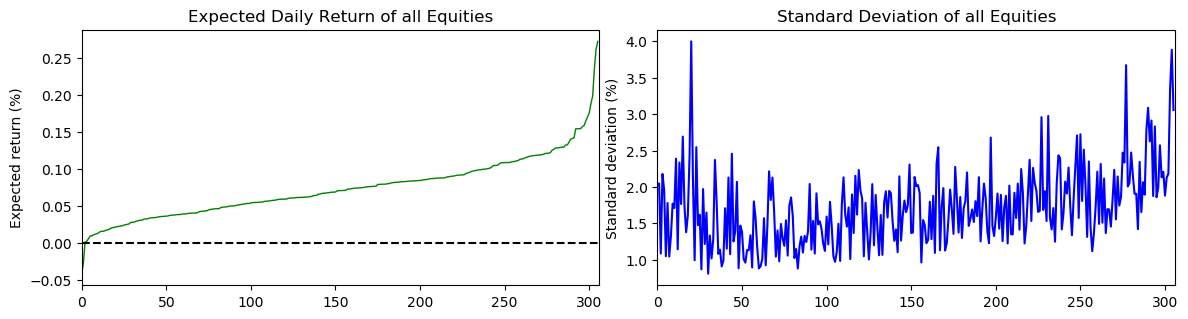

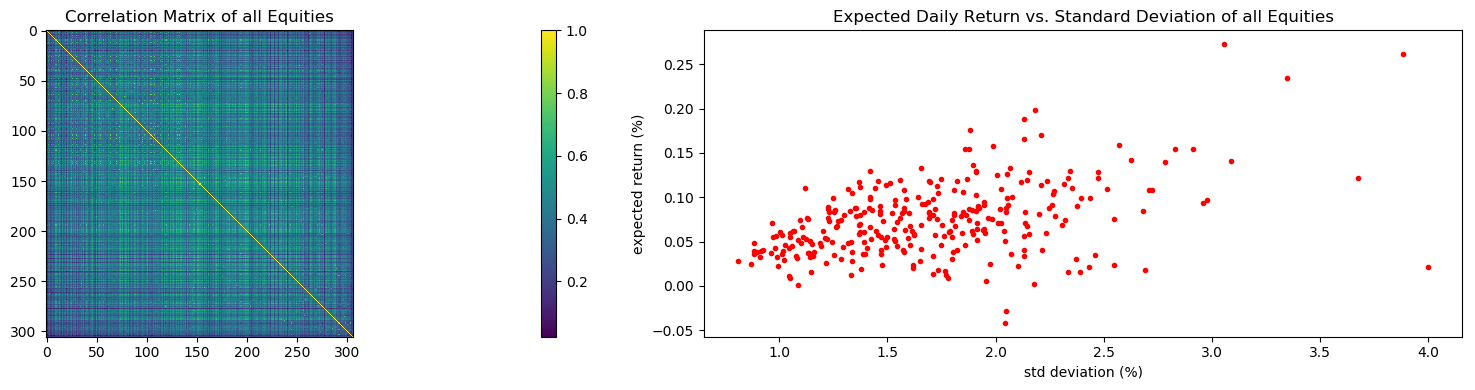

In [58]:
using PyPlot
fig = figure(figsize=(12,6))

plot1 = fig[:add_subplot](2,2,1);
xlim(0,nAssets)
plot(μ[ix], linewidth = 1, c = :green)
plot([0,nAssets],[0,0],"k--")
ylabel("Expected return (%)")
title("Expected Daily Return of all Equities")

plot2 = fig[:add_subplot](2,2,2);
xlim(0,nAssets)
plot(sqrt.(diag(Σ))[ix],c = :blue)
ylabel("Standard deviation (%)")
title("Standard Deviation of all Equities")
tight_layout()

fig = figure(figsize=(16,4))
plot3 = fig[:add_subplot](1,2,1); 
# plot correlation matrix (shows which assets are correlated with which other assets)
corr = diagm(0 => diag(Σ).^(-1/2))*Σ*diagm(0 => diag(Σ).^(-1/2))
imshow(corr[ix,ix]);colorbar();axis("image")
title("Correlation Matrix of all Equities")

# plot each asset individually
plot4 = fig[:add_subplot](1,2,2);
plot(sqrt.(diag(Σ)), μ, "r.")
xlabel("std deviation (%)")
ylabel("expected return (%)")
title("Expected Daily Return vs. Standard Deviation of all Equities")
tight_layout()
;

The four plots above show the following:  
#### 1. Expected Daily Return of all Equities (Top-Left): 

This plot shows the expected daily return (%) of all equities that could make up the optimal portfolio. The equities are in sorted order from low to high expected returns which is why the curve is increasing from left to right. The range of expected returns for these 306 equites is from -0.04% to  0.27% per day. It is also noticed that there are very few equities that have a negative expected return. This will greatly reduce the available options to fill the short-only optimal portfolio if we weight the expected return term of the objective relatively more than the other terms.

#### 2.  Standard Deviation of all Equities (Top-Right): 

This plot shows the daily standard deviation (%) of all equities. The trend of the plot is increasing overall. Since the stocks are sorted in increasing order in terms of their expected returns, it can be hypothesised that stocks with higher variability may also offer higher returns. The range of standard deviations for these 306 equities is from 0.81% to 4.00% per day.
#### 3.  Correlation Matrix of all Equities (Bottom-Left):  

This plot shows the correlation between each pair of equities. The closer the color is to yellow, the more closely correlated the two stocks are; conversely, the closer the color is to purple, the more independent the two stocks are of each other. With a great number of comparisons, it becomes difficult to extract precise conclusions between any specific pair of stocks. Overall, it appears many of the stocks are fairly correlated (0.4-0.6). 
#### 4.  Expected Daily Return vs. Standard Deviation of all Equities (Bottom-Right): 

This plot reinforces the observation made from plot 2 that it appears that higher returns are associated with higher levels of variation. This can be extrapolated from the weak-moderate positive linear trend.



### 4.B. Optimal Portfolio Examples \- Long Positions ###

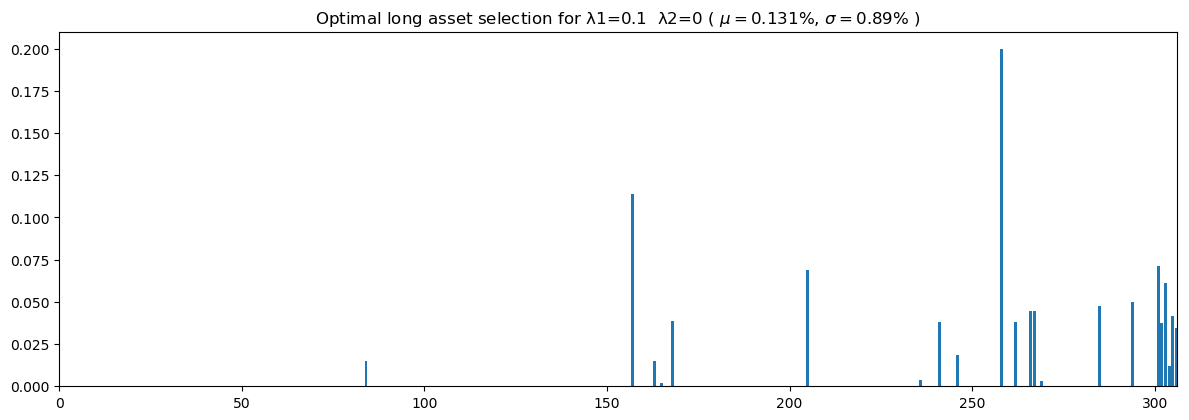

Portfolio returns (percent) 0.22555112327358362


,Companies,Valuation_when_bought,Valuation_when_sold,Percent_invested,Returns
,Any,Any,Any,Any,Any
1,AAL,3.84482e10,2.82953e10,0.0119159,-314.659
2,AAPL,6.13349e11,6.60003e11,0.0443217,337.131
3,ABC,1.73754e10,2.11682e10,0.00383701,83.7569
4,ALXN,3.66159e10,4.03941e10,0.0374325,386.25
5,AWK,9.55335e9,1.06921e10,0.0389212,463.941
6,AZO,1.79235e10,2.29268e10,0.2,5582.84
7,BIIB,8.02108e10,7.06517e10,0.0713871,-850.751
8,CHD,1.066e10,1.11293e10,0.00182481,8.03466
9,CMG,2.12448e10,1.49162e10,0.0614689,-1831.1


In [59]:
# Optimal Long-only portfolio generated by just using the Markowitz MPT

λ1 = 0.1 #Risk tradeoff
λ2 = 0 #Tradeoff weight on valuation model

(xsol1, ix1, ret, std, exp_increase) = opt_long_portfolio(λ1, λ2)

# For later use in the pareto frontier
xsolm = xsol1
ixm = ix1 

check_profits(ix1, 100000, raw_test[77:78], raw_val[77:78], xsol1)

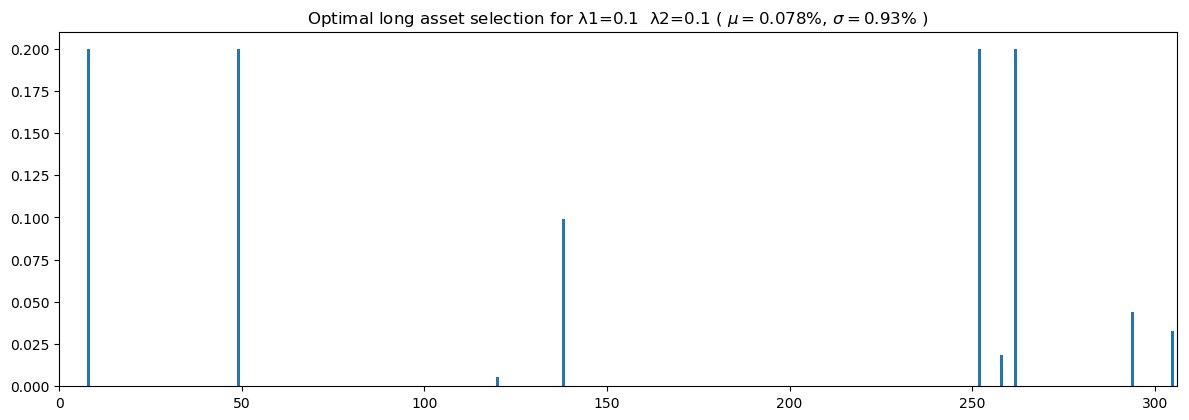

Portfolio returns (percent) 0.2309653610517507


,Companies,Valuation_when_bought,Valuation_when_sold,Percent_invested,Returns
,Any,Any,Any,Any,Any
1,AZO,1.79235e10,2.29268e10,0.0186759,521.324
2,DLTR,1.10019e10,1.46402e10,0.2,6613.96
3,DUK,5.91375e10,4.96381e10,0.2,-3212.66
4,F,2.35562e10,5.58525e10,0.0990553,13580.8
5,GILD,1.43477e11,1.48128e11,0.0441801,143.236
6,MA,1.00206e11,1.10341e11,0.2,2022.89
7,NFLX,2.05273e10,4.83713e10,0.0326983,4435.33
8,PPL,2.39035e10,2.30462e10,0.2,-717.294
9,RRC,8.89966e9,4.09412e9,0.00539016,-291.052


In [60]:
# Optimal Long-only portfolio generated using the Markowitz MPT and results from Valuation Model

λ1 = 0.1 #Risk tradeoff
λ2 = 0.1 #Tradeoff weight on valuation model

(xsol1, ix1, ret, std, exp_increase) = opt_long_portfolio(λ1, λ2)
check_profits(ix1, 100000, raw_test[77:78], raw_val[77:78], xsol1)

The first portfolio above shows what an optimized portfolio using purely MPT approach would look like. When using a trade-off weight of 0.1 for the risk of the portfolio, you can see the composition of the optimal portfolio as well as the resulting profit that could have been realized if held for a year (2014 - 2015). The annual returns are calculated as 22.6%.

The second portfolio mirrors the first with the addition of a non-zero weight to the third term of the objective function: maximizing percent difference between expected and actual value of the company (in 2014). When considering the difference in what the company is valued at and what it's current price is, the optimal portfolio generated consisted of mostly different stocks and we were able to achieve a portfolio that returned 23.10%.

In this example, the enhanced returns were nearly negligible; however, we can change the trade-off weights for different results.

### 4.C. Optimal Portfolio Examples \- Short Positions ###

**Note:** Negative "Portfolio Returns" for a short porfolio denote a profit (since stocks were sold at higher level than they were later covered). Positive returns denote a loss on investement. We are not including potential borrowing rates since the investor does not own stock when shorting assets and must borrow them.

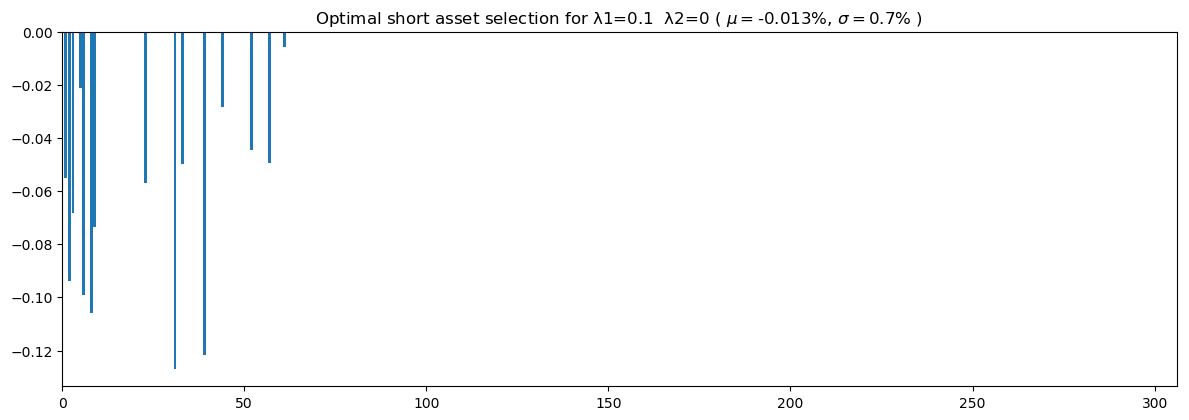

Portfolio returns (percent) 0.022990736119473786


,Companies,Valuation_when_bought,Valuation_when_sold,Percent_invested,Returns
,Any,Any,Any,Any,Any
1,CAG,1.33069e10,1.62548e10,0.0281898,624.488
2,CLX,1.18332e10,1.35577e10,0.0443318,646.04
3,CPB,1.39224e10,1.48599e10,0.0498849,335.941
4,DGX,9.73508e9,1.02517e10,0.0735371,390.229
5,ETR,1.60312e10,1.08226e10,0.068168,-2214.81
6,FTR,6.82392e9,3.15628e9,0.0211217,-1135.23
7,MCD,9.19187e10,1.11015e11,0.0492133,1022.4
8,NEM,9.41294e9,9.20419e9,0.0939865,-208.438
9,PCG,2.51459e10,2.60954e10,0.0992156,374.632


In [61]:
# Optimal Short-only portfolio generated by just using the Markowitz MPT

λ1 = 0.1 #Risk tradeoff
λ2 = 0 #Tradeoff weight on valuation model

(xsol1, ix1, ret, std, exp_increase) = opt_short_portfolio(λ1, λ2)
check_profits(ix1, 100000, raw_test[77:78], raw_val[77:78], xsol1)

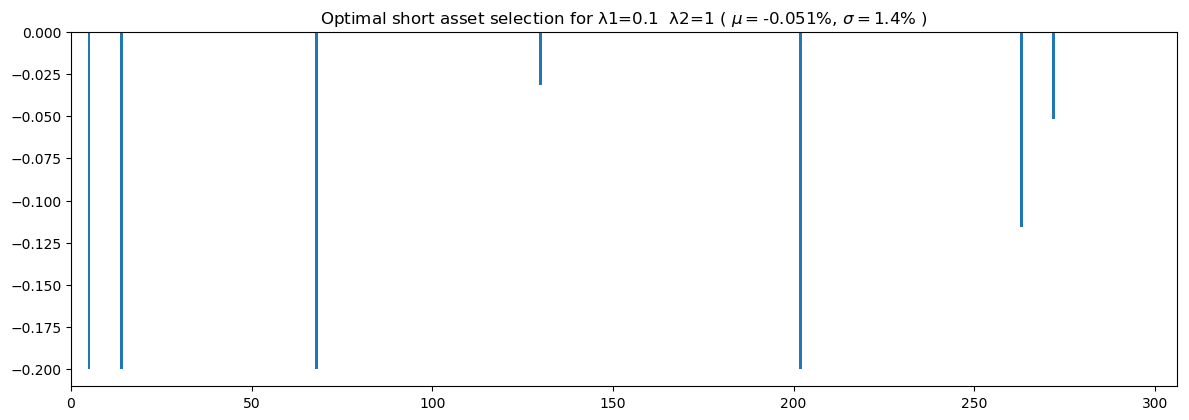

Portfolio returns (percent) -0.2801032203318026


,Companies,Valuation_when_bought,Valuation_when_sold,Percent_invested,Returns
,Any,Any,Any,Any,Any
1,BBY,8.02774e9,1.22951e10,0.000914173,48.5949
2,CF,2.19106e10,9.13622e9,0.115879,-6756.0
3,FCX,1.02154e10,7.2764e9,0.2,-5754.0
4,FTR,6.82392e9,3.15628e9,0.2,-10749.4
5,HOLX,7.0238e9,1.12e10,0.0314616,1870.64
6,OKE,1.04263e10,5.16336e9,0.0516852,-2608.93
7,R,4.89685e9,3.01217e9,0.2,-7697.53
8,SYMC,1.37763e10,1.6281e10,0.2,3636.28


In [62]:
# Optimal Short-only portfolio generated using the Markowitz MPT and results from Valuation Model

λ1 = 0.1 #Risk tradeoff
λ2 = 1 #Tradeoff weight on valuation model

(xsol1, ix1, ret, std, exp_increase) = opt_short_portfolio(λ1, λ2)
check_profits(ix1, 100000, raw_test[77:78], raw_val[77:78], xsol1)

The first portfolio above shows what an optimized portfolio using purely MPT approach would look like. When using a trade-off weight of 0.1 for the risk of the portfolio, you can see the composition of the optimal portfolio as well as the resulting profit that could have been realized if you sold short and held all of these positions for a year (2014 - 2015). The annual returns are calculated as -2.3%. This is likely caused by the fact that there are only a few stocks in our dataset that have negative expected returns.

The second portfolio mirrors the first with the addition of a non-zero weight to the third term of the objective function: minimizing percent difference between expected and actual value of the company (in 2014). When considering the difference in what the company is valued at and what it's current price is, the optimal portfolio generated consisted of mostly different stocks and we were able to achieve a portfolio that returned 27.9%.

In this example, the enhanced returns were quite signifigant and the addition of the valuation model proved to be quite successful. Again, we can change the trade-off weights for different results.

### 4.D. Pareto Frontier ###

In [63]:
# compute optimal tradeoff curve (this may take a few minutes)
N = 50
ret = zeros(N)
std = zeros(N)
lambda_values = exp10.(range(-3,stop=4,length=N))

m = Model(solver = MosekSolver(LOG=0))

@variable(m, x[1:nAssets])
@constraint(m, max_c[i in 1:nAssets], x[i] >= 0)
@constraint(m,sum(x) == 1)

for (i,λ) in enumerate(lambda_values)
    @objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
    solve(m)
    xsol = getvalue(x)
    ret[i] = dot(μ,xsol)
    std[i] = sqrt(dot(xsol,Σ*xsol))
end

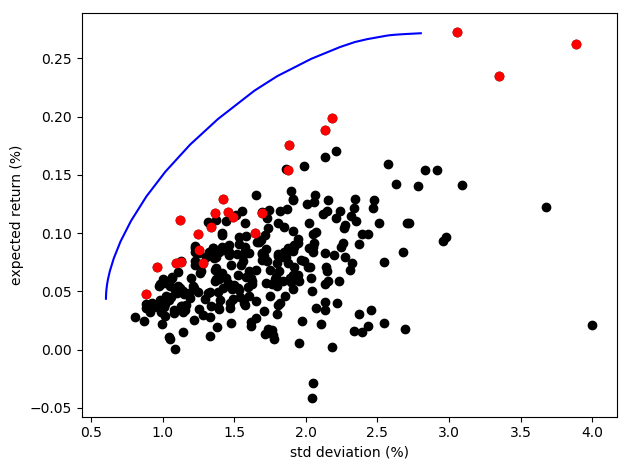

In [64]:
# plot tradeoff curve
plot(std,ret,"b-")
plot(sqrt.(diag(Σ)), μ, "k.", markersize=12)
plot(sqrt.(diag(Σ))[ixm], μ[ixm], "r.", markersize=12)  # low-risk portfolio
xlabel("std deviation (%)")
ylabel("expected return (%)")
#axis([1.5,4.5,0,.4]);
tight_layout()

The above plot shows the expected returns of the basket of stocks versus their respective standard deviation (or risk). The blue curve shows the trade off of different weights between maximizing returns and minimizing risk. Ideally, we would prefer stocks that have a high expected return coupled with a low risk. Since stocks that generate larger returns on average tend to pose greater risk, the investor may choose a tradeoff based on their risk tolerance. 

The points in red are the stocks chosen for an optimal Markowitz MPT portfolio with the trade off of 0.1 for risk (The first long portfolio we generated above). 

### 4.E Accuracy of Models and Possible Improvements ###

As discussed near the outset of this report, our group desired to build a project that could give some clear reflection of reality. There were a few instances where we encountered events that could lead to possible flaws in the conclusions that were determined. 

The first potential issue was that we needed a sufficient amount of data for the Equity Valuation Model (LS Regression) to solve to optimality. This had two effects on our model.  First, with the limited amount of data that we had, it became necessary to use the entire dataset (1,230 samples) to determine the optimal weights of each fundamental attribute. Consequently, the test data that is used to build the optimal portfolios in sections 4.b and 4.c are samples that were also used to build the model. This use of the data for the training set and the test set can lead to overfitting and results that may not be able to be achieved in practice. A potential improvement is to collect more data and have the training and test set completely independent of each other.  The second problem lies with how people evaluate popular stocks.  Because of the lack of data, if a company’s value is artificially inflated or deflated by public opinion, such as Apple’s stock, then the model will consistently underestimate or overestimate the stock’s value.  Having more data to train the model with would help this issue.

Another potential issue that we noticed was that the data that we collected to build the optimal portfolios was mostly comprised of stocks that had a positive expected return. When constructing the short-only portfolio, we were then forced to give the expected return portion of the objective value less weight so that the model was not forced to choose between less than 5 stocks to generate a portfolio. To improve this, additional stock data would need to be collected so that there were more equities with negative expected returns. 

We would also like to note something about the robustness of our model. The years that our sample data was collected ranged between 2012 to 2016. These years lie within a bull-market that followed the 2007-2008 financial crisis; thus, our model may not be suitable for all market conditions.


## 5. Conclusion ##

This optimization project explores the task of attempting to accurately value a company’s stock, and then use that valuation in a Markowitz portfolio in attempts to generate portfolios that will have superior returns coupled with reasonable risk. Given that many investors have different appetites for potential risks and possible rewards, we have provided a trade off curve to explore the interaction between multiple objectives: maximizing expected returns, and minimizing risk. A tradeoff surface exists when including the maximizing the amount that a company is undervalued (Minimize all objectives for short portfolio) objective but we couldn't generate a plot with meaningful insight, so it was excluded from the discussion. The project uses real data so that the derived results may be more significant and applicable in practice. In the future, we would like to have access to more data and from multiple time periods to increase the robustness of the proposed models. It may be possible to explore the plausibility of using different models during different market conditions, but these are just a few of the possible extensions to this project.

This project shows how optimization can be applied to financial markets and business valuation. We realize that many large corporations likely use much more sophisticated models than the ones proposed in this report; however, we believe that these models are adequate at introducing the lay-investor to optimization in finance and also do a fine job at accomplishing the objectives that we had laid out.  

Disclaimer: The models and discussion in this report is not to be taken as investment advice. Use of this model in practice may lead to substantial losses in which our group is not responsible for. The models only exist for theoretical exploration and all conjecture is purely academic. Hypothetical or simulated performance is not indicative of any future results.


## 6. References ##

Chen, James. “Modern Portfolio Theory (MPT).” Investopedia, Investopedia, 17 Apr. 2019, www.investopedia.com/terms/m/modernportfoliotheory.asp.

Kenton, Will. “Markowitz Efficient Set.” Investopedia, Investopedia, 12 Mar. 2019, www.investopedia.com/terms/m/markowitzefficientset.asp.

McClure, Ben. “What Are Stock Fundamentals?” Investopedia, Investopedia, 2 Apr. 2019, www.investopedia.com/articles/fundamental/03/022603.asp.

Surz, Ron. “U.S. Stock Market Is Biggest & Most Expensive In World, But U.S. Economy Is Not The Most Productive.” NASDAQ.com, Nasdaq, 2 Apr. 2018, www.nasdaq.com/article/us-stock-market-is-biggest-most-expensive-in-world-but-us-economy-is-not-the-most-productive-cm942558.
